<a href="https://colab.research.google.com/github/lmkwytnicholas/nicholas-lee.github.io/blob/master/Seoul_Bikes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seoul Bike Project**

* What are the factors that influence the number of bikes rented?
* Explore the data for outliers and missing values.
* Plot the correlation between the variables and state your comments
* Please build a linear regression model to predict rented bike count by choosing appropriate independent variables.
* Comment on Model performance by using approapriate diagnostics and measures.


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='dark', color_codes=True)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Tech I.S./Datasets/Linear Regression/SeoulBikeData.csv')
test = pd.read_csv('/content/drive/MyDrive/Tech I.S./Datasets/Linear Regression/SeoulBikeData.csv')
# Omit dependent variable, Rented Bike Count, from test dataset
test = test.drop('Rented Bike Count', axis=1)
# Concatenate all datasets for clean-up
data = pd.concat([train,test],ignore_index=True)


In [ ]:
# Print dimensions of dataset
print('Dimensions of Seoul Bikes Train Dataset:', train.shape)
print('Dimensions of Seoul Bikes Test Dataset:', test.shape)
print('Dimensions of Combined Datasets:', data.shape)

Dimensions of Seoul Bikes Train Dataset: (8760, 14)
Dimensions of Seoul Bikes Test Dataset: (8760, 13)
Dimensions of Combined Datasets: (17520, 14)


# **Extract DataFrame for Only Numeric DataTypes**
..and summarize

In [ ]:
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   float64
 1   Hour                      17520 non-null  int64  
 2   Temperature(C)            17520 non-null  float64
 3   Humidity(%)               17520 non-null  int64  
 4   Wind speed (m/s)          17520 non-null  float64
 5   Visibility (10m)          17520 non-null  int64  
 6   Dew point temperature(C)  17520 non-null  float64
 7   Solar Radiation (MJ/m2)   17520 non-null  float64
 8   Rainfall(mm)              17520 non-null  float64
 9   Snowfall (cm)             17520 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.3 MB


In [ ]:
# df.columns
columns = ['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for column in columns:
  df[column] = df[column].fillna(df[column].mean())

In [ ]:
# Descriptive Statistics
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,456.069066,6.922384,11.944484,20.361832,1.036270,608.281351,13.059997,0.868721,1.128161,0.436734
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,504.750000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,704.602055,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,704.602055,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Manage for Missing Values**

In [ ]:
na_df = df.isna().sum()
na_df

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

# **Construct Correlation Matrix**

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df_corr = df.corr()
# type(df_corr)
df.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.290096,0.380818,-0.141266,0.085637,0.140912,0.268551,0.185147,-0.087026,-0.100270
Hour,0.290096,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.380818,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.141266,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.085637,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.140912,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.268551,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.185147,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.087026,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.100270,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# **Extract Strongly Correlated Values**

In [ ]:
# type(df_corr)
df_corr = df_corr['Rented Bike Count'][:-1]
df_corr[abs(df_corr)>=0.60].sort_values(ascending=False)
df_corr

Rented Bike Count           1.000000
Hour                        0.290096
Temperature(C)              0.380818
Humidity(%)                -0.141266
Wind speed (m/s)            0.085637
Visibility (10m)            0.140912
Dew point temperature(C)    0.268551
Solar Radiation (MJ/m2)     0.185147
Rainfall(mm)               -0.087026
Name: Rented Bike Count, dtype: float64

# **Plot Correlation Matrix**

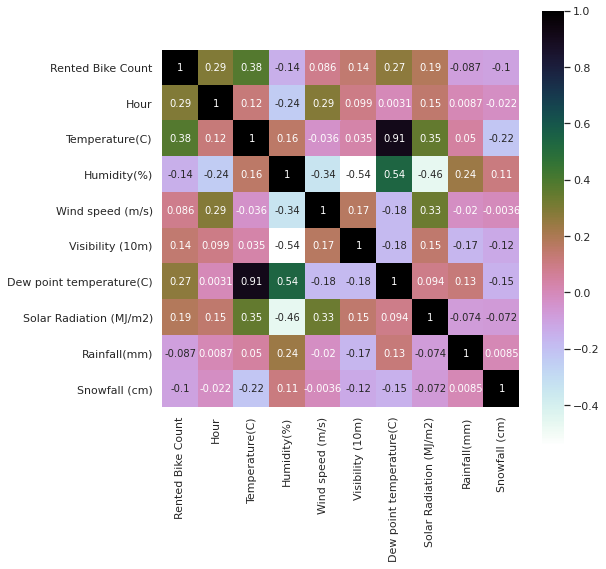

In [ ]:
df_corr = df.corr()
plt.figure(figsize=[8,8])
sns.heatmap(df_corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

# **Train Test Split**

In [ ]:
# # df_train.columns
df_train = df[['Rented Bike Count', 'Hour', 'Temperature(C)','Dew point temperature(C)']]
df_test = df[[ 'Hour', 'Temperature(C)','Dew point temperature(C)']]


In [ ]:
'''df_train = df[['Hour', 'Temperature(C)', 'Dew point temperature(C)']]
df_test = df[['Rented Bike Count']]'''

# from sklearn.model_selection import train_test_split
# train,val = train_test_split(df_train,df_test,test_size=0.25)

"df_train = df[['Hour', 'Temperature(C)', 'Dew point temperature(C)']]\ndf_test = df[['Rented Bike Count']]"

In [ ]:
df_train.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)',
       'Dew point temperature(C)'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Hour', 'Temperature(C)', 'Dew point temperature(C)'], dtype='object')

# **Construct Correlation Matrix**

In [ ]:
data_corr = df_train.corr()

# **Extract Strongly Correlated Features**

In [ ]:
 data_corr = data_corr['Rented Bike Count'][:-1]
 data_corr[abs(data_corr)>=0.30].sort_values(ascending=False)

Rented Bike Count    1.000000
Temperature(C)       0.380818
Name: Rented Bike Count, dtype: float64

# **Plot Correlation Matrix**

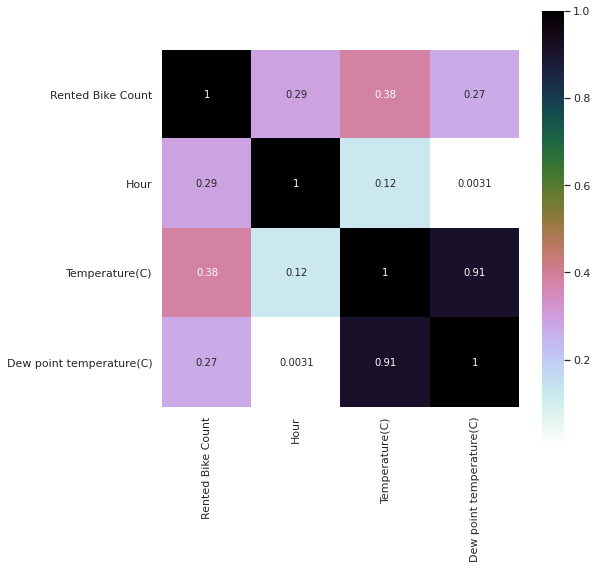

In [ ]:
corr = df_train.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [ ]:
df_train.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)',
       'Dew point temperature(C)'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Hour', 'Temperature(C)', 'Dew point temperature(C)'], dtype='object')

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(df_train,test_size=0.25)

In [ ]:
train_x = train.drop(['Rented Bike Count'],axis=1)
train_y = train['Rented Bike Count']

val_x = val.drop(['Rented Bike Count'],axis=1)
val_y = val['Rented Bike Count']

print('Dimension of train_x:',train_x.shape)
print('Dimension of train_y:',train_y.shape)
print('Dimension of val_x:',val_x.shape)
print('Dimension of val_y:',val_y.shape)

Dimension of train_x: (13140, 3)
Dimension of train_y: (13140,)
Dimension of val_x: (4380, 3)
Dimension of val_y: (4380,)


In [ ]:
train_x.isnull().sum()

Hour                        0
Temperature(C)              0
Dew point temperature(C)    0
dtype: int64

In [ ]:
train_x.dtypes

Hour                          int64
Temperature(C)              float64
Dew point temperature(C)    float64
dtype: object

In [ ]:
train_y.dtypes

dtype('float64')

# **Linear Regression**


## **Linear Fit for Training Datasets**

In [ ]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
model=ln_reg.fit(train_x,train_y)

## **Tests: Scoring Models Linear vs. Ridge vs. Lasso**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = ln_reg.predict(val_x)
print('Mean absolute error of linear regression:',mean_absolute_error(df_pred,val_y))
print('Mean square error of linear regression:',mean_squared_error(df_pred,val_y))
print('R_squared score of linear regression:',r2_score(df_pred,val_y))

Mean absolute error of linear regression: 285.00762317925364
Mean square error of linear regression: 156139.69151205957
R_squared score of linear regression: -2.4869745241538777


In [ ]:
df_test.shape

(17520, 3)

In [ ]:
predict_test = ln_reg.predict(df_test)
print(predict_test)
df_pred = pd.DataFrame(df_pred)
print(df_pred)

[345.35094944 351.65135262 354.11295452 ... 740.90817492 741.09693654
 744.2028497 ]
                0
0      664.297695
1     1042.681335
2      966.577365
3      672.301506
4      999.402448
...           ...
4375   557.331815
4376   777.643353
4377   695.274215
4378  1025.048002
4379   961.193704

[4380 rows x 1 columns]


In [ ]:
submission_data = pd.DataFrame({'Predicted_Rented_Bike_Count':predict_test})
submission_data



,Predicted_Rented_Bike_Count
0,345.350949
1,351.651353
2,354.112955
3,361.764548
4,391.867206
...,...
17515,757.729156
17516,747.045825
17517,740.908175
17518,741.096937


In [ ]:
val_yy=pd.DataFrame(val_y)
val_yy['Predicted'] = submission_data['Predicted_Rented_Bike_Count']
val_yy

,Rented Bike Count,Predicted
112,435.000000,664.297695
6286,1546.000000,1042.681335
15757,704.602055,966.577365
3451,50.000000,672.301506
7145,1442.000000,999.402448
...,...,...
11886,704.602055,557.331815
13729,704.602055,777.643353
1103,230.000000,695.274215
3593,2094.000000,1025.048002


## **Ridge L2**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ !=0)
ridge.coef_

print("Training score:",ridge_score)
print("Number of feature used:",coeff_used)

Training score: 0.22901703742377577
Number of feature used: 3


## **Lasso L1**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

lasso.fit(train_x, train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ !=0)
lasso.coef_

array([ 13.75846715,  24.80023596, -11.29486921])

In [ ]:
print('Training score:', lasso_score)
print('Number of features used:',coeff_used)

Training score: 0.22898636278165996
Number of features used: 3


#Conclusion
